In [158]:
# подготовка датасета и nервичный анализ и сделать итоги
# импорт нужных для анализа библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

math = pd.read_csv('stud_math.csv')

# найти все пустышки
math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [159]:
# знакомство с файлом и какого типа даные  хранятся в  столбцах
display(math.head(15))
math.info()

# и какие  переменные сейчас статистически  важны дла анализа, если бы мы все так оставили

def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for col in [
    'sex', 'school', 'age', 'address', 'famsize', 'studytime, granular','Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_stat_dif(col)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [160]:
""" 
в описании задание  столбец 'studytime, granular'  не был упмянут.  Я вывел корелацию этого столбца и 'studytime'.
Кореляция идеальная отрицательная. То есть описания этого столбца нет и он корелирует отрицательно со 'studytime'. 
Скорее всего какие-то математические действия были проведены со столбцом 'studytime' и так появился 'studytime, granular'
"""
display(math['studytime'].corr(math['studytime, granular']))

-0.9999999999999991

In [161]:
""" 
думаю что 'studytime, granular' можно исключить из датасета, так как он не описан и 'studytime' покроет ето абсолютно
"""
math.drop(['studytime, granular'], inplace=True, axis=1)

In [162]:
""" 
проведем общий осмотр данных  что бы оценить  получить первый глобальный обзот данных
а потом приступить к анализу каждого из столбцов отдельно
"""


def describer(column):
    return display(pd.DataFrame(math[column].value_counts()))


for col in math.columns:
    describer(col)

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


,address
U,295
R,83


,famsize
GT3,261
LE3,107


,Pstatus
T,314
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34


,guardian
mother,250
father,86
other,28


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,failures
0.0,293
1.0,49
2.0,16
3.0,15


,schoolsup
no,335
yes,51


,famsup
yes,219
no,137


,paid
no,200
yes,155


,activities
yes,195
no,186


,nursery
yes,300
no,79


,higher
yes,356
no,19


,internet
yes,305
no,56


,romantic
no,240
yes,124


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [163]:
# большинство столбцов имeют пропуски. Будем анализировать столбцы и принимать решения что делать с пустыми данными

# 2 школы в датасэте и 3 величина ето пустышки. столбец будер иррелевантным в анализе. Абслютное большинство из одной школы
math.drop(['school'], inplace=True, axis=1)

In [164]:
# Столбец sex без  пустых значений. осталяем все как есть


# switch off wwarnings

import warnings
warnings.simplefilter('ignore')

In [165]:
# создадим несколько функций которы мы сможем использовать в следующих задания


# просмотр значений столбцов дла первичного анализа данных
def describer(column):
    return display(pd.DataFrame(math[column].value_counts()))
# идентификация выбросов


def outlier(column):
    perc25 = math[column].quantile(0.25)
    perc75 = math[column].quantile(0.75)
    IQR = perc75 - perc25
    return ('25-й перцентиль: {},'.format(perc25)[:-1], '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR),
            "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# заполнение пустых данных модой в качественных столбцах где МОДА чрезвычайно доминантна


def fill_mode(column):
    math[column].fillna((math[column].mode()[0]), inplace=True)
    
    
def fill_mean(column):
    math[column].fillna(found((math[column].MEAN()[0]),0), inplace=True)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


('25-й перцентиль: 16.0',
 '75-й перцентиль: 18.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [13.0, 21.0].')

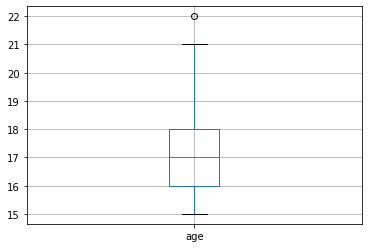

In [166]:
math.boxplot(column=['age'])  # похоже на то чот есть выбросы

describer('age')
outlier('age')

In [167]:
# несмотря что границы выбросов это 21, я хочу исключить из анализа результаты от 20. Слишком нерепрезентативая группа..

math = math.drop(math['age'][math.age >= 20].index)

In [168]:
describer('address')
# пустых значения мало и город доминирует поэтому заполним пустые значения модой
fill_mode('address')

,address
U,292
R,82


In [169]:
describer('famsize')
# пустых значения мало и GT3 доминирует поэтому заполним пустые значения модой
fill_mode('famsize')

,famsize
GT3,257
LE3,106


In [170]:
describer('Pstatus')
# пустых значения относительно много, поэтому создамим новый критерий  'U' -unknown
math.Pstatus = math.Pstatus.apply(lambda x: 'U' if pd.isna(x) == True else x)

,Pstatus
T,311
A,34


In [171]:
describer('Medu')
# пустых значений супер мало  поэтому заполним пустые значения модой
fill_mode('Medu')

,Medu
4.0,130
2.0,101
3.0,95
1.0,58
0.0,3


In [172]:
describer('Fedu')
math.Fedu[math.Fedu == 40] = 4  # похоже что по ошибке приписали 40 вместо 4

,Fedu
2.0,103
3.0,96
4.0,88
1.0,76
0.0,2
40.0,1


In [173]:
describer('Fedu')
""" 
аспределение довольно равномерное и я охотно мы распределил пустые значения мезды первой 4.  Но этог код я не смогу написать.

Поэтому я сдлеаю верезку из датафрейма с пропущенными значениями дла Fedu и посмотрю распределение дла Medu в этой вырезке
"""
Fedu_check = pd.DataFrame(math[pd.isnull(math.Fedu)]).reset_index()
Fedu_check = Fedu_check.drop(['index'], axis=1)
display(Fedu_check.Medu.value_counts())

# здесь тоже нету явной моды. Поэтому посмотрю распределение Fedu дла топ 3 показателей
Fedu_check2 = math[math.Fedu == 4]
display(Fedu_check2.Medu.value_counts())
Fedu_check2 = math[math.Fedu == 3]
display(Fedu_check2.Medu.value_counts())
Fedu_check2 = math[math.Fedu == 2]
display(Fedu_check2.Medu.value_counts())

# распределение Medu  в Fedu_check  наибболее блиско распределанию Medu  в math для  '3'

math.Fedu = math.Fedu.fillna(3)
display(math.Fedu.value_counts())

,Fedu
2.0,103
3.0,96
4.0,89
1.0,76
0.0,2


4.0    10
3.0     7
2.0     4
1.0     3
Name: Medu, dtype: int64

4.0    63
3.0    18
2.0     7
1.0     1
Name: Medu, dtype: int64

4.0    40
3.0    34
2.0    17
1.0     5
Name: Medu, dtype: int64

2.0    46
3.0    24
4.0    18
1.0    13
0.0     2
Name: Medu, dtype: int64

3.0    120
2.0    103
4.0     89
1.0     76
0.0      2
Name: Fedu, dtype: int64

In [174]:
describer('Mjob')
# пустых значений мало  поэтому заполним пустые значения модой и она  довольно-таки логична
fill_mode('Mjob')

,Mjob
other,132
services,95
at_home,58
teacher,55
health,31


In [175]:
describer('Fjob')
# пустых значений мало  поэтому заполним пустые значения модой и она  довольно-таки логична
fill_mode('Fjob')

,Fjob
other,194
services,100
teacher,29
at_home,16
health,15


In [176]:
describer('reason') # яркого лидера нету, поэтому посмотрим среды пустышек как ваглядит дистанциа до дома

reason_distance = pd.DataFrame(math[pd.isnull(math.reason)]).reset_index()
reason_distance = reason_distance.drop(['index'],axis=1)
display(reason_distance.traveltime.value_counts())

#для большинста доезд очень которткий поэтому пропускам припишем  home

math.reason=math.reason.apply(lambda x:'home' if pd.isna(x) ==True else x)
describer('reason')

,reason
course,133
home,104
reputation,103
other,33


1.0    13
2.0     2
Name: traveltime, dtype: int64

,reason
course,133
home,121
reputation,103
other,33


In [177]:
describer('guardian')
# пустых значений супер мало  поэтому заполним пустые значения модой
fill_mode('guardian')

,guardian
mother,249
father,86
other,27


In [178]:
describer('traveltime')
# пустых значений супер мало  поэтому заполним пустые значения модой, которая в свою очередь равна медиане
fill_mode('traveltime')

,traveltime
1.0,238
2.0,95
3.0,22
4.0,7


In [179]:
describer('studytime')
# пустых значений супер мало  поэтому заполним пустые значения модой, которая в свою очередь равна медиане
fill_mode('studytime')

,studytime
2.0,193
1.0,100
3.0,63
4.0,27


In [180]:
describer('failures')
# пустых значений супер мало  поэтому заполним пустые значения модой, которая в свою очередь равна медиане
fill_mode('failures')
# не уверен вообще важен ли этот критерий но посмотрим дальше

,failures
0.0,292
1.0,49
2.0,14
3.0,13


In [181]:
describer('schoolsup')
# пустых значений супер мало  поэтому заполним пустые значения модой
fill_mode('schoolsup')

,schoolsup
no,331
yes,51


In [182]:
describer('famsup')
# пустых значений  мало  поэтому заполним пустые значения модой
fill_mode('famsup')

,famsup
yes,217
no,134


In [183]:
""" 
сложно сделать вавод, но продолжим с модой. На стороне делал сравнения с другими показателями занятости
и выходило  всегда no (например schoolsup, activities, freetime)
но подумал что глупо бидет связывать это вместе основываясь исключительно на интуицци. И поэтому в аргументации пойду с модой
"""
describer('paid')
fill_mode('paid')

,paid
no,197
yes,153


In [184]:
describer('activities')
# пустых значений  мало  поэтому заполним пустые значения модой
fill_mode('activities')

,activities
yes,194
no,182


In [185]:
describer('nursery')
# пустых значений  мало  поэтому заполним пустые значения модой  + мода доминантна что и логично
fill_mode('nursery')

,nursery
yes,298
no,76


In [186]:
describer('higher')
# пустых значений  мало  поэтому заполним пустые значения модой  + мода доминантна что и логично
fill_mode('higher')

,higher
yes,353
no,18


In [187]:
describer('internet')
# пустых значений  мало  поэтому заполним пустые значения модой  + мода доминантна что и логично
fill_mode('internet')

,internet
yes,303
no,53


In [188]:
describer('romantic')
# пустых значений  мало  поэтому заполним пустые значения модой  + что и логично
fill_mode('romantic')

,romantic
no,237
yes,122


In [189]:
describer('famrel')
# -1 тут по ошибке видимо, назо заменить на 1
math.famrel[math.famrel==-1]=1
describer('famrel')

,famrel
4.0,182
5.0,94
3.0,62
2.0,17
1.0,7
-1.0,1


,famrel
4.0,182
5.0,94
3.0,62
2.0,17
1.0,8


In [190]:
# пустых значений не мало  но заполним пустые значения модой, которая в свою очередь равна медиане
fill_mode('famrel')

In [191]:
describer('freetime')
# пустых значений  мало  и заполним пустые значения модой, которая в свою очередь равна медиане
fill_mode('freetime')

,freetime
3.0,153
4.0,110
2.0,63
5.0,35
1.0,18


In [192]:
describer('goout')
# пустых значений  мало  и заполним пустые значения модой
fill_mode('goout')

,goout
3.0,124
2.0,101
4.0,83
5.0,51
1.0,23


In [193]:
describer('health')
# пустых значений  мало  и заполним пустые значения модой
fill_mode('health')

,health
5.0,137
3.0,87
4.0,62
1.0,46
2.0,43


,absences
0.0,110
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,7
7.0,6


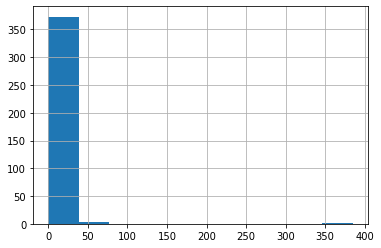

In [194]:
describer('absences')
math.absences.hist()
# похоже что есть выбросы поэтому проверим их, причем интересовать на будет только верхная граница

In [195]:
describer('absences')
# самое сложное решени было тут. но иду по моде так как она доминитует сильно по сравнению со средней
fill_mode('absences')
outlier('absences')
# удаляем выбросы выше верхней границы
math = math.drop(math['absences'][math.absences > 20].index)
describer('absences')


,absences
0.0,110
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,7
7.0,6


,absences
0.0,122
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,7
16.0,6


In [196]:
describer('score')
# 0 кажутся нелогичными и неправдоподобными, поэтому припишем им среднеед значение
# может те по какой-либо причине не смогли придти на экзамен. Так как сложно набрать 0 на экзамене со 100 бальной шкалой
mean_score=round(math.score.mean(),0)
math.score=math.score.apply(lambda x: mean_score if x==0 else x)

,score
50.0,54
55.0,42
0.0,37
75.0,32
60.0,31
65.0,30
70.0,27
40.0,27
45.0,23
80.0,16


In [197]:
#на всякий случай проверим нет ли пустышек и эсли что заполним их средним результатом
math.score=math.score.apply(lambda x:mean_score if pd.isna(x) ==True else x)

,score
50.0,54
52.0,43
55.0,42
75.0,32
60.0,31
65.0,30
70.0,27
40.0,27
45.0,23
80.0,16


('25-й перцентиль: 50.0',
 '75-й перцентиль: 70.0,',
 'IQR: 20.0, ',
 'Границы выбросов: [20.0, 100.0].')

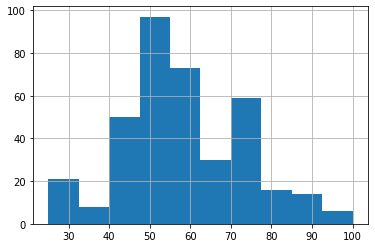

In [198]:
describer('score')
math.score.hist()
outlier('score')
# выбросов нет

In [199]:
'''''
кореляции довольно слабые перемменых между собой как и с результатами теста. 
Что может быть кочнечно частично обусловлено методом заполнения пропусков (хотйы пропуски составляли от 5 до 15 %).
Либо тем что перееменные действительно не сильно скорелированы. 
Плюс разбег у абсолютного большинства перемменых кроме пропусков довольно таки маленький, 
так как это в большинстве своем номинативны переменные которые выражены с помощью числен, 
но которые имеют логическую числовую градации. 
Поэтому о корелации тут и не стоило так много ожидать. Поэтому логично пиступить k тесту Стьюдента

Из результатов ниже стоит отметить между failures, goout, age,absences - замечена слабая негативная корелация, 
поэтому можно будет их рассматривать в дальнейшем анализе после тестa Стьюдента

Таже самая картина c переменными   Medu, Fedu, studytime где замечена слабая позитивная корелация

'''''
math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.187724,-0.153520,0.103365,0.016547,0.142664,0.019611,0.006495,0.141284,-0.038768,0.133896,-0.146087
Medu,-0.187724,1.000000,0.602557,-0.181581,0.086077,-0.259429,-0.013034,0.052984,0.052432,-0.063724,0.067671,0.192812
Fedu,-0.153520,0.602557,1.000000,-0.149833,0.017091,-0.258391,-0.008943,0.007627,0.044330,0.002372,-0.020639,0.133728
traveltime,0.103365,-0.181581,-0.149833,1.000000,-0.091429,0.065472,-0.013656,0.003358,0.048025,-0.045089,-0.024860,-0.071970
studytime,0.016547,0.086077,0.017091,-0.091429,1.000000,-0.167028,0.044197,-0.120862,-0.034530,-0.074805,-0.068700,0.137425
failures,0.142664,-0.259429,-0.258391,0.065472,-0.167028,1.000000,-0.051015,0.056168,0.087073,0.116924,0.057357,-0.262398
famrel,0.019611,-0.013034,-0.008943,-0.013656,0.044197,-0.051015,1.000000,0.150537,0.067548,0.089339,-0.080954,0.051418
freetime,0.006495,0.052984,0.007627,0.003358,-0.120862,0.056168,0.150537,1.000000,0.280604,0.059098,0.086010,0.005047
goout,0.141284,0.052432,0.044330,0.048025,-0.034530,0.087073,0.067548,0.280604,1.000000,0.004787,0.081454,-0.144704
health,-0.038768,-0.063724,0.002372,-0.045089,-0.074805,0.116924,0.089339,0.059098,0.004787,1.000000,-0.002595,-0.107841


In [200]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

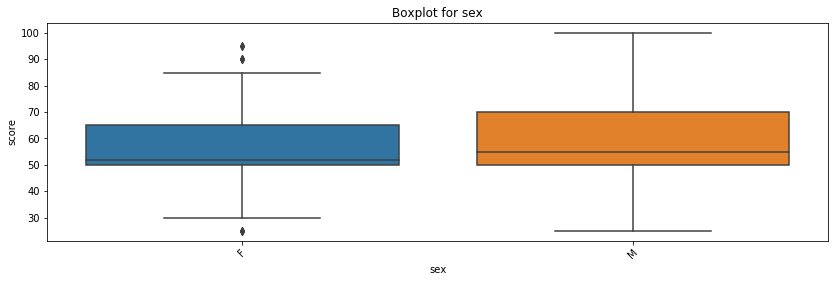

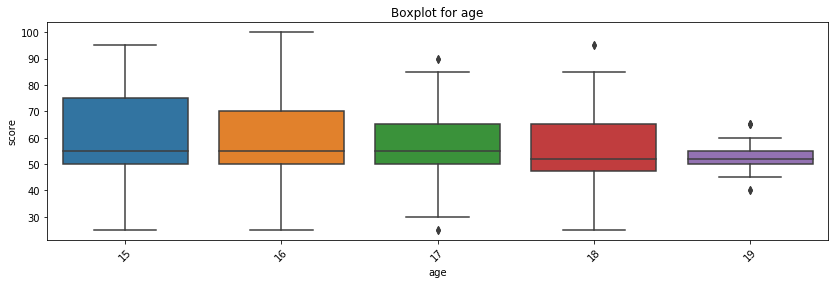

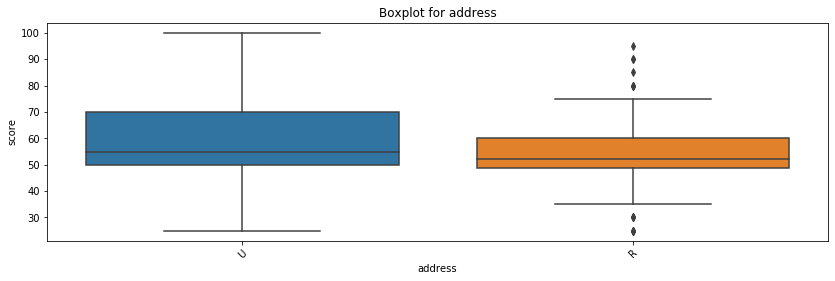

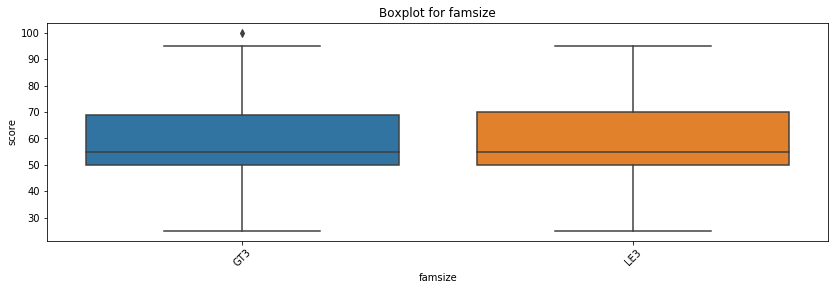

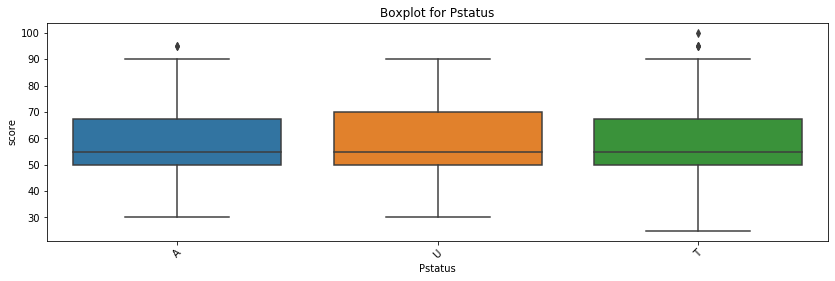

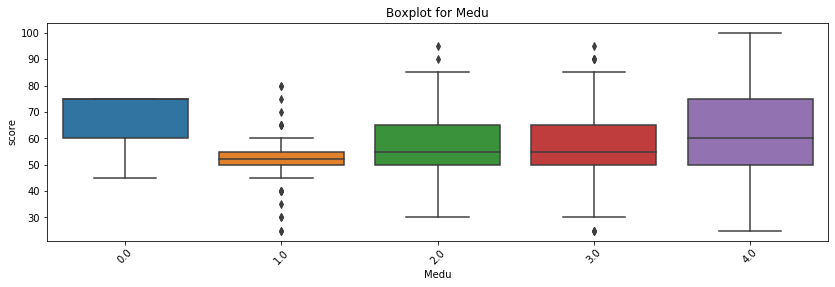

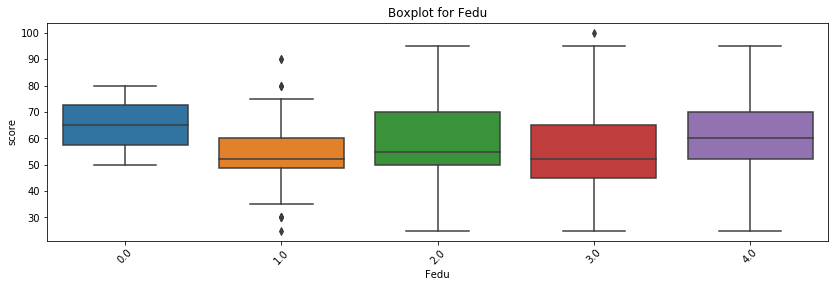

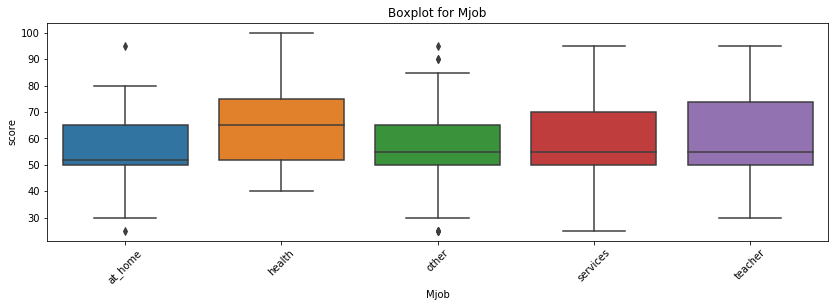

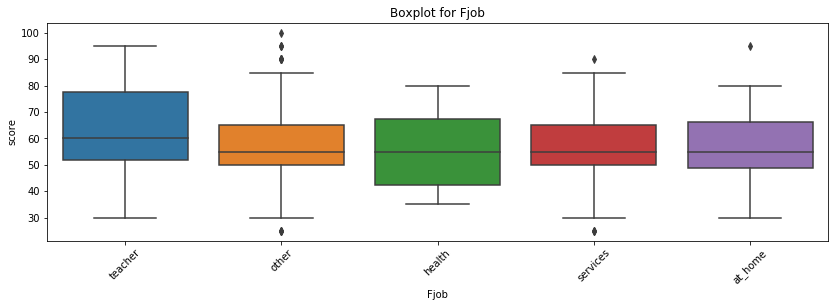

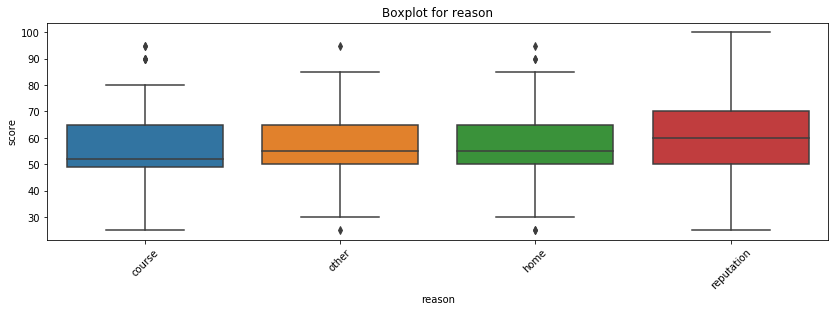

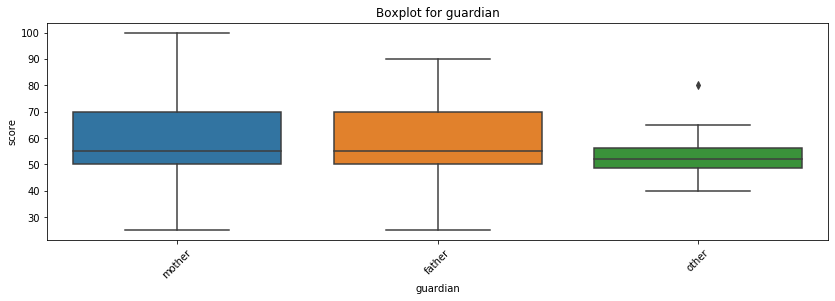

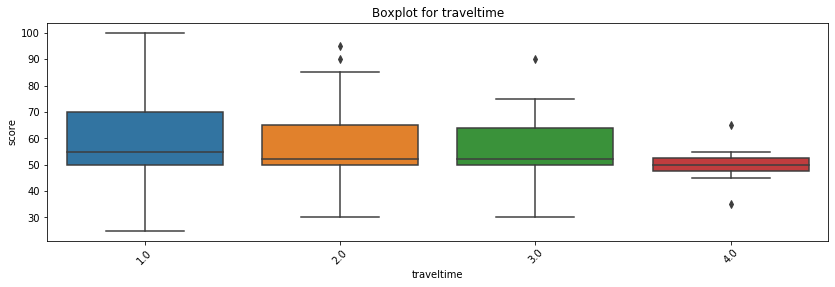

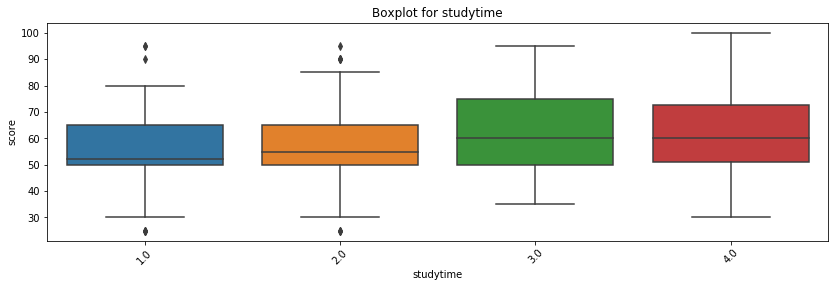

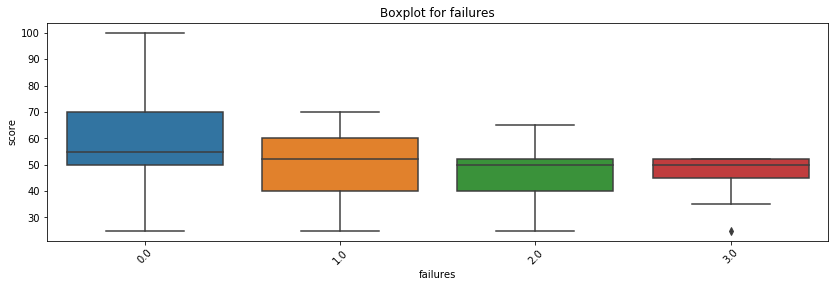

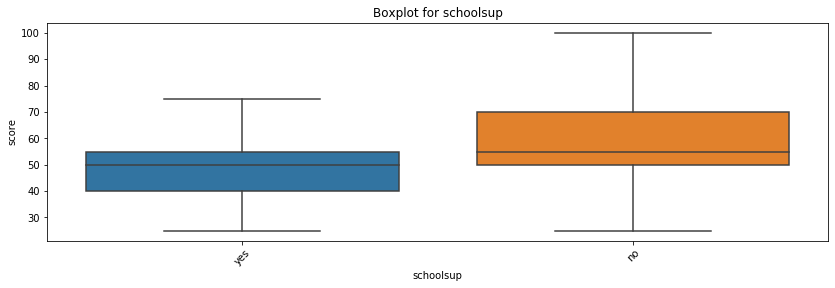

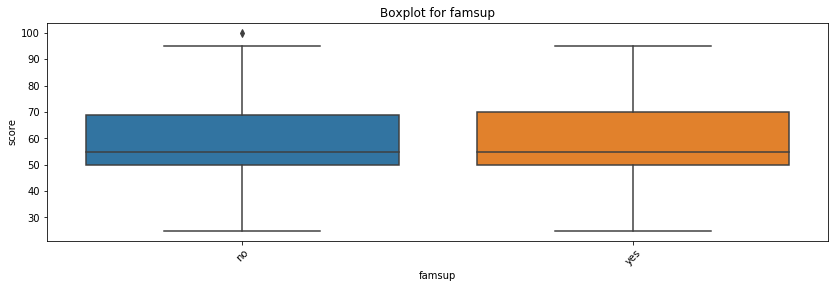

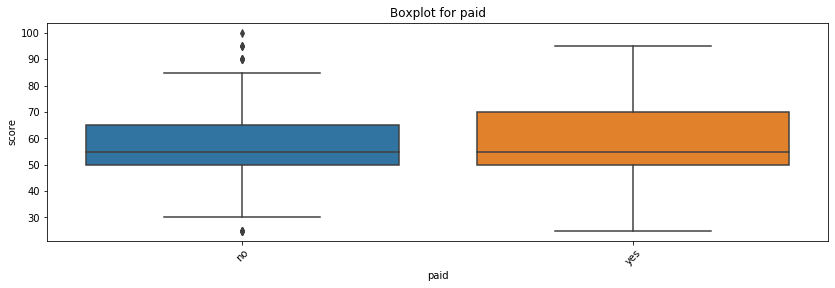

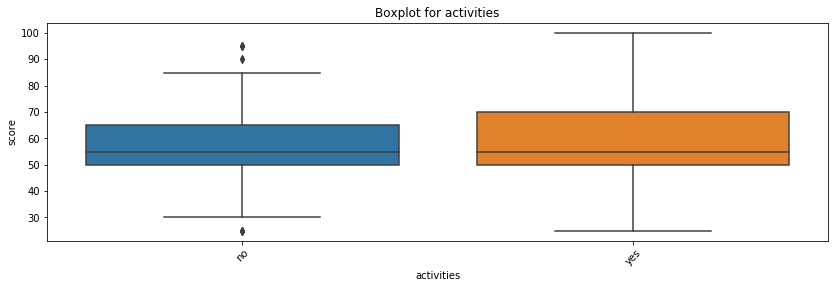

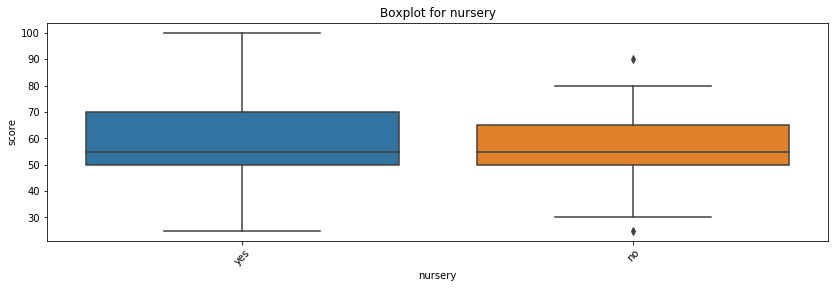

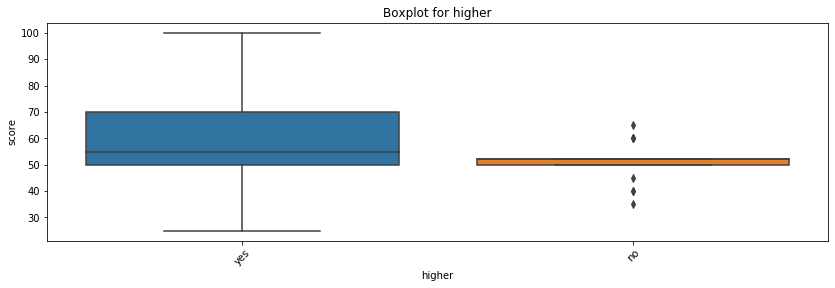

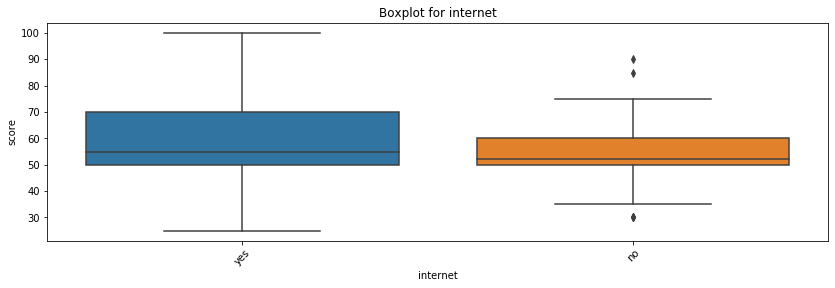

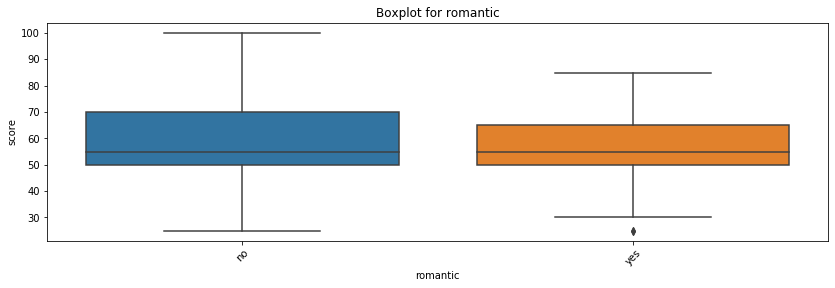

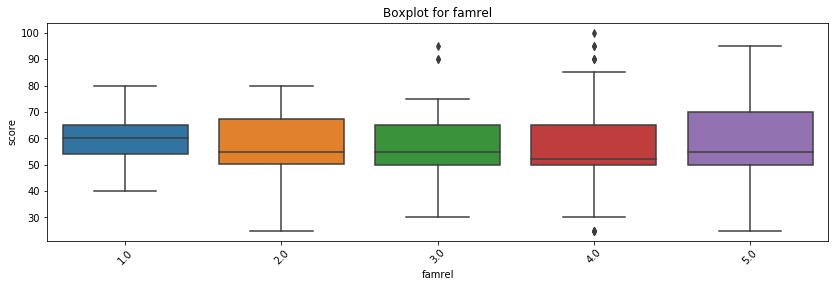

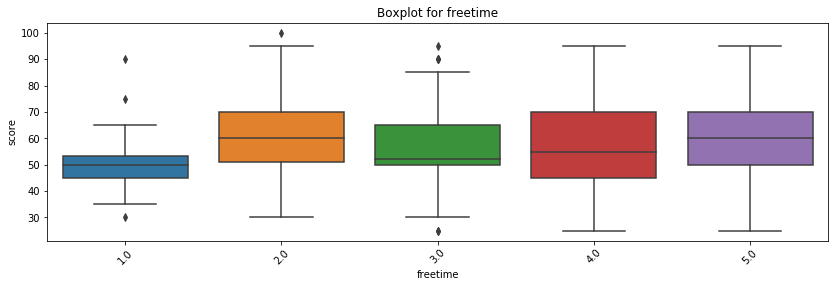

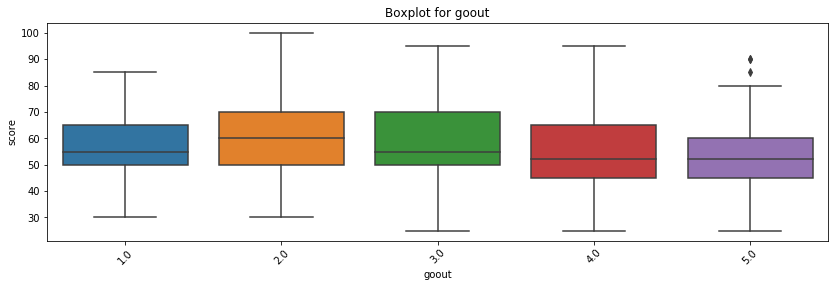

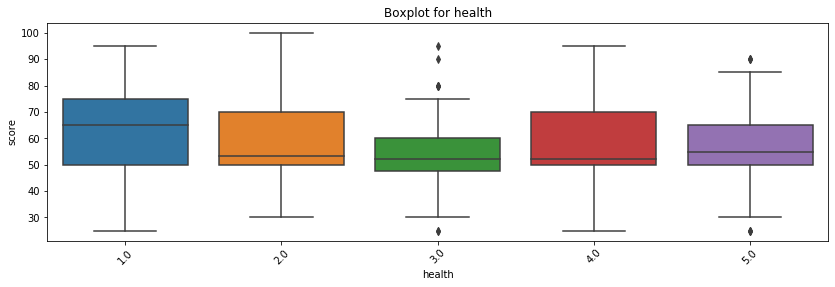

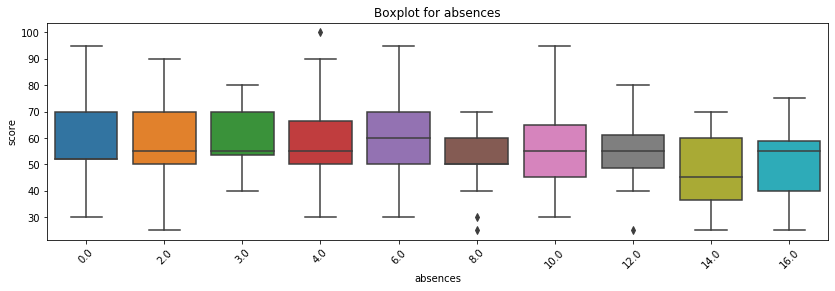

In [201]:
for col in [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences'
]:
    get_boxplot(col)

# Визуал создает впечатление что следующие переменные могут быть связаны с результатом:
# Medu, Fedu, Mjob, studytime, failures, goout, freetime, health

In [202]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [207]:
for col in [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
    'romantic', 'famrel', 'freetime', 'goout', 'health'
]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки health


In [ ]:
'''''
довольно таки много переменны оказалось статистически значемыми для предикции результата. 
Конечно сложно понять так ли это на самом деле. 
Так как мое решение было заполнять данные иногда модой, иногда руководствуясь другими критериями. 
Незаю просто нужно ли преследовать консистность выбора. Поэтому менялся подход. Хотя основное больсгинство взяла на себя мода.
Заполнене пропусков данными конечно дало свой результат.
я сделал проверку на суровых даных и намного меньше переменных вышо статистически значимыми(только Mjob). 
конечно было бы неплохо поэксперементировать может с медианой или 
созданием постооянно дополнительной переменной для пропусков(когда 2 значения только у номинальной переменной). 
Но не знаю является ли это правильным подходом. 
Опыта у меня в это области нет поэтому тут я пробывал идти как казалось логическим.
целью было потрнировать пройденный материал. 
Факт что метод работы с пропусками игрет большую роль, така как пропусков было по сути мало, но картинку это все поменяло.

Дла дальшего анализа я бы взял переменные которы вашли статистически  релевантными + 
absences, так как это втйрая значимая величина из коррелационаого анализа(просто дла интереса). 
Я знаю что корелация н обясняет причино-следственную связь

Дико извиняюсь за русский. Это проблематичная тема в последние года.
Бало бы круто заливать голосовые сообщения, так как разговорный еще удалось удержать на каком-то там уроване.
'''''